# Polyfit

Let's return to our polynomial fitting armed with our new tool, and use it to separate the order of the polynomial from the number of data points.

An $n$ th degree polynomial,

$$ y(x) = a_n x^n + a_{n-1} x^{n-1} \dots a_2 x^2 + a_1 x +a_0$$

can be applied to $m$ data points,

$y(x_i) = a_n x_i^n + a_{n-1} x_i^{n-1} \dots a_2 x_i^2 + a_1 x_i +a_0 = y_i$

to generate an $m \times n$ matrix, multiplied by an $n$ vector of polynomial coefficients to equal an $m$ vector of data:

$$
 \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix} =
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_m
\end{bmatrix}
$$

#### Example: Determine the coefficients of a cubic polynomial

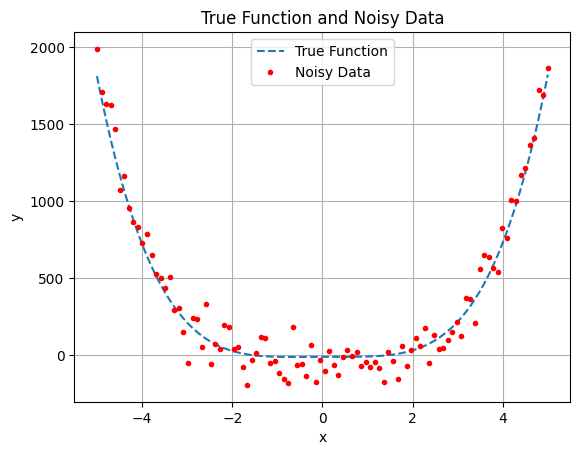

In [14]:
# prompt: generate 100 samples of the function 3x^4-2x^2+x-9 with +-100 noise. Plot the true curve with dashed lines and the data with small points in red.

import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(-5, 5, 100)

# Define the true function
def true_function(x):
  return 3 * x**4 - 2 * x**2 + x - 9

# Calculate the true y values
y_true = true_function(x)

# Generate noisy data
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 100, 100)
x_data = np.linspace(-5, 5, 100)
y_data = true_function(x_data) + noise

# Plot the true curve and the data
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function and Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


[[-1.25000000e+02  2.50000000e+01 -5.00000000e+00  1.00000000e+00]
 [-1.17576257e+02  2.40001020e+01 -4.89898990e+00  1.00000000e+00]
 [-1.10452422e+02  2.30206101e+01 -4.79797980e+00  1.00000000e+00]
 [-1.03622311e+02  2.20615243e+01 -4.69696970e+00  1.00000000e+00]
 [-9.70797404e+01  2.11228446e+01 -4.59595960e+00  1.00000000e+00]
 [-9.08185260e+01  2.02045710e+01 -4.49494949e+00  1.00000000e+00]
 [-8.48324846e+01  1.93067034e+01 -4.39393939e+00  1.00000000e+00]
 [-7.91154325e+01  1.84292419e+01 -4.29292929e+00  1.00000000e+00]
 [-7.36611859e+01  1.75721865e+01 -4.19191919e+00  1.00000000e+00]
 [-6.84635612e+01  1.67355372e+01 -4.09090909e+00  1.00000000e+00]
 [-6.35163748e+01  1.59192939e+01 -3.98989899e+00  1.00000000e+00]
 [-5.88134431e+01  1.51234568e+01 -3.88888889e+00  1.00000000e+00]
 [-5.43485822e+01  1.43480257e+01 -3.78787879e+00  1.00000000e+00]
 [-5.01156087e+01  1.35930007e+01 -3.68686869e+00  1.00000000e+00]
 [-4.61083388e+01  1.28583818e+01 -3.58585859e+00  1.00000000e

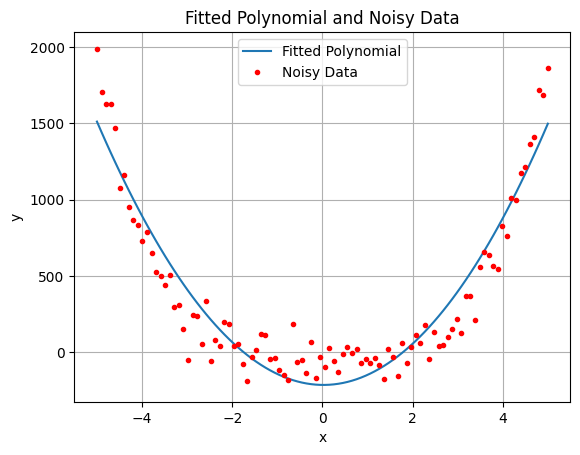

In [15]:
# prompt: Generate the vermonde matrix for a cubic polynomial, invert it using pinv and the y data to find the coefficients of the polynomial and then plot it along with the data

import matplotlib.pyplot as plt
import numpy as np
# Generate the Vandermonde matrix for a cubic polynomial
n = 3  # Degree of the polynomial
X = np.vander(x_data, n + 1)

# Calculate the coefficients using the pseudoinverse
coefficients = np.linalg.pinv(X) @ y_data

coeffs = np.polyfit(x_data, y_data, 3)
print('Coefficients calculated manually', coefficients, '\n')
print('Coefficients calculated with polyfit', coeffs)

# Generate y values for the fitted polynomial
fitted_polynomial = np.poly1d(coeffs)
y_fitted = fitted_polynomial(x)


# Plot the fitted polynomial along with the data
plt.plot(x, y_fitted, label='Fitted Polynomial')
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial and Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


#### Example 2: Find a series of 'best fit polynomials'

Degree 0: Residual Norm = 5515.03, Coefficients = [370.23]
Degree 1: Residual Norm = 5514.73, Coefficients = [-1.97, 370.23]
Degree 2: Residual Norm = 1759.53, Coefficients = [68.74, -1.97, -214.2]
Degree 3: Residual Norm = 1759.49, Coefficients = [0.06, 68.74, -2.93, -214.2]
Degree 4: Residual Norm = 923.52, Coefficients = [3.03, 0.06, 2.62, -2.93, -45.63]
Degree 5: Residual Norm = 917.81, Coefficients = [-0.08, 3.03, 2.38, 2.62, -15.58, -45.63]
Degree 6: Residual Norm = 917.57, Coefficients = [0.01, -0.08, 2.8, 2.38, 4.56, -15.58, -47.98]
Degree 7: Residual Norm = 916.86, Coefficients = [-0.0, 0.01, 0.1, 2.8, 0.23, 4.56, -9.51, -47.98]
Degree 8: Residual Norm = 916.67, Coefficients = [-0.0, -0.0, 0.05, 0.1, 2.15, 0.23, 7.55, -9.51, -50.1]
Degree 9: Residual Norm = 916.49, Coefficients = [0.0, -0.0, -0.02, 0.05, 0.45, 2.15, -2.0, 7.55, -5.65, -50.1]
Degree 10: Residual Norm = 916.28, Coefficients = [0.0, 0.0, -0.01, -0.02, 0.24, 0.45, 0.53, -2.0, 12.3, -5.65, -52.29]


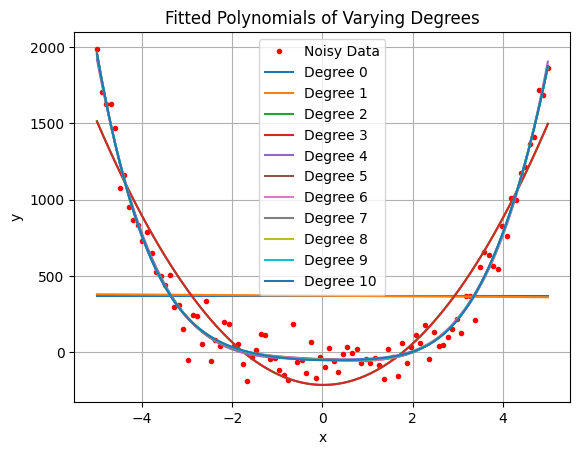

In [16]:
# prompt: parameterize polyfit for degrees 0 to 10, plotting each on the same plot along with the sample data. Output the norm of the residuals for each fit along with the coefficients to 2 decimal places

import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(-5, 5, 100)

# Define the true function
def true_function(x):
  return 3 * x**4 - 2 * x**2 + x - 9

# Generate noisy data
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 100, 100)
x_data = np.linspace(-5, 5, 100)
y_data = true_function(x_data) + noise

# Plot the true curve and the data
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

for degree in range(11):
    coeffs = np.polyfit(x_data, y_data, degree)
    fitted_polynomial = np.poly1d(coeffs)
    y_fitted = fitted_polynomial(x)
    plt.plot(x, y_fitted, label=f'Degree {degree}')
    residuals = y_data - fitted_polynomial(x_data)
    residual_norm = np.linalg.norm(residuals)
    print(f"Degree {degree}: Residual Norm = {residual_norm:.2f}, Coefficients = {[round(c, 2) for c in coeffs]}")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomials of Varying Degrees')
plt.legend()
plt.grid(True)
plt.show()


Interesting points: The curve actually is 4th order but because additional terms will always reduce the error, it is not trivial to tell which is the *best*, best fit!

#### Example 3: Consider the condition number of the Vermonde matrix for increasing n

In [17]:
# prompt: print the condition number for an increasing series of vermonde matricies on 10 data points

import numpy as np
# Generate x values
x_data = np.linspace(-5, 5, 10)

for degree in range(1, 11):
    # Generate the Vandermonde matrix for a given degree
    X = np.vander(x_data, degree + 1)

    # Calculate the condition number
    condition_number = np.linalg.cond(X)

    print(f"Degree {degree}: Condition Number = {condition_number:.2f}")


Degree 1: Condition Number = 3.19
Degree 2: Condition Number = 20.60
Degree 3: Condition Number = 94.89
Degree 4: Condition Number = 583.63
Degree 5: Condition Number = 2841.25
Degree 6: Condition Number = 17743.56
Degree 7: Condition Number = 95457.72
Degree 8: Condition Number = 648343.57
Degree 9: Condition Number = 5082996.99
Degree 10: Condition Number = 25360712.21


Recall that as the condition number strays from 1, numerical algorithms deteriorate. This is why low-order polynomials are more numerically robust to fit than high order!